In [1]:
using PyPlot
using PyCall
@pyimport numpy as np
@pyimport matplotlib.pyplot as PyPlt

In [2]:
function mySplit(s::String)
    return split(s)
end
@vectorize_1arg String mySplit

function Phase(t,T,t_0)
    return ((t-t_0)/T-(trunc((t-t_0)/T)))
end

function dual_sort(a,b)
    d=Dict()
    for i in 1:length(a)
        d[a[i]]=b[i]
    end
    sa=sort(a)
    sb=zeros(length(a))
    for i in 1:length(a)
        sb[i]+=d[sa[i]]
    end
    return sa,sb
end

function string_sum(x,y)
    a=0
    for i in 1:length(x)-1
        a+=sqrt((x[i+1]-x[i])^2+(y[i+1]-y[i])^2)
    end
    return a
end

string_sum (generic function with 1 method)

In [3]:
_1=time()

f=open("OGLE-BLG-CEP-01.dat")
lines=readlines(f)

HJD=zeros(length(lines))
Mag=zeros(length(lines))
err=zeros(length(lines))

for i in 1:length(lines)
    HJD[i]+=parse(Float64,split(lines[i])[1])
    Mag[i]+=parse(Float64,split(lines[i])[2])
    err[i]+=parse(Float64,split(lines[i])[3])
end
_2=time()

t0=HJD[findfirst(Mag,minimum(Mag))]


println(_2-_1)

0.05481600761413574


In [4]:
println(maximum(err))
println(length(HJD))

0.049
349


In [5]:
_1=time()

r=0.2:0.0001:10
val=1:100
sums=zeros(length(r))
for i in 1:length(r)
    ph=Phase(HJD[val],r[i],t0)
    sph,sm=dual_sort(ph[val],Mag)
    sums[i]+=string_sum(sph,sm)
end

_2=time()
print("seconds = ")
print(_2-_1)
per=r[findfirst(sums,minimum(sums))]
print("      Minimum (possibly an armonic of the period) = $per")

seconds = 5.9603211879730225      Minimum (possibly an armonic of the period) = 2.5976

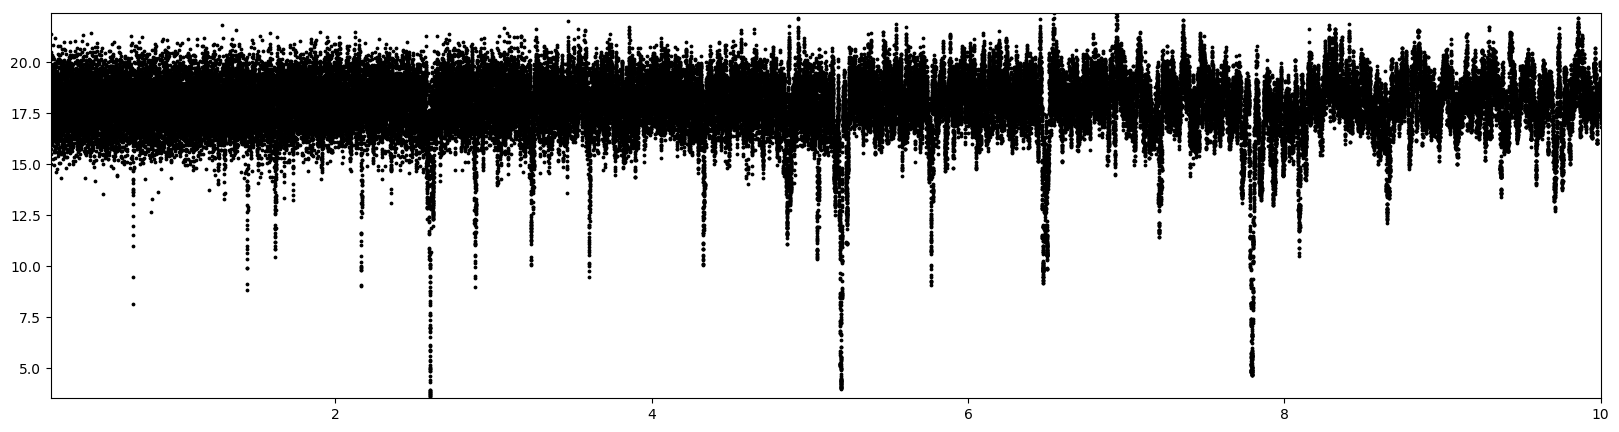

3.5394090257494497


In [6]:
fig1, ax = PyPlt.subplots(figsize=(20, 5))
PyPlt.scatter(r,sums,s=3,color="black")
PyPlt.axis([minimum(r),maximum(r),minimum(sums),maximum(sums)])
println(minimum(sums))

In [7]:
period=per

2.5976

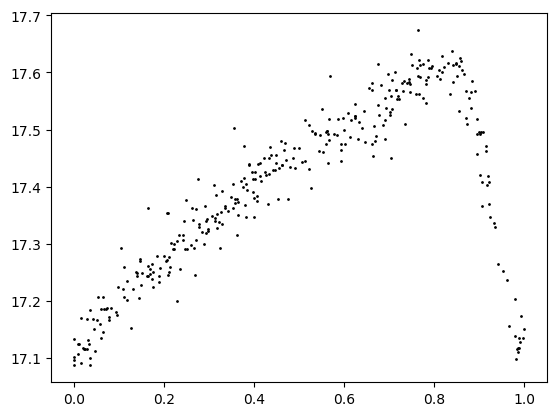

2.5976


In [8]:
ph=Phase(HJD, period,t0)
for i in 1:length(ph)
    if ph[i]<0
        ph[i]+=1
    end
end
PyPlt.scatter(ph,Mag,s=1,color="black")
println(period)

In [9]:
final_phase=np.concatenate((ph-1,ph,ph+1,ph-1))
final_magnitude=np.concatenate((Mag,Mag,Mag,Mag))
maximum(HJD)

3779.85829

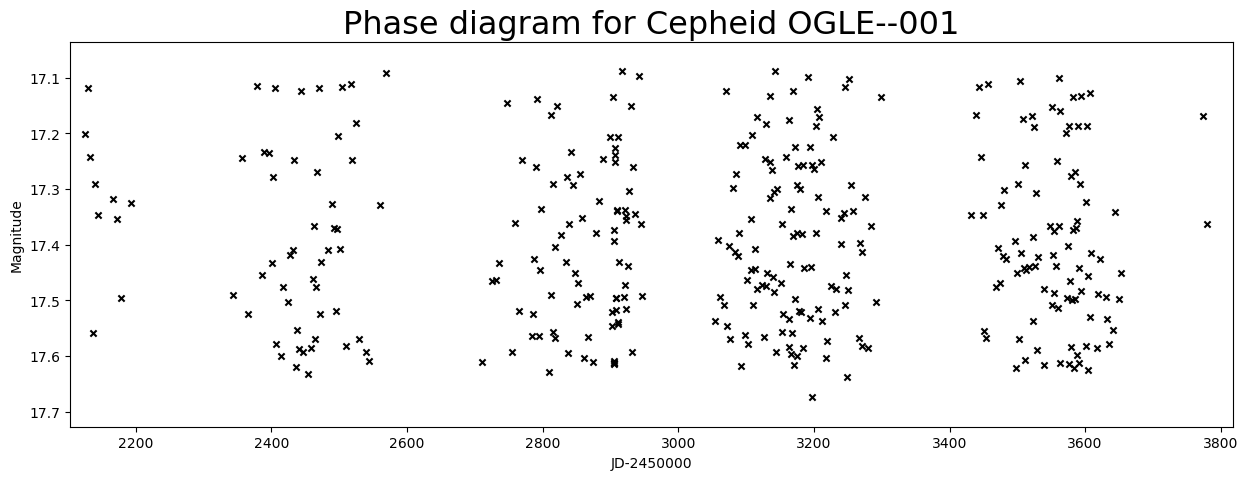

In [10]:
fig2, ax = PyPlt.subplots(figsize=(15, 5))
scatter(HJD,Mag,s=20,c="k",marker="x")

xlabel("JD-2450000")
ylabel("Magnitude")
title("Phase diagram for Cepheid OGLE--001",fontsize=23)

xmin=minimum(HJD)*0.99
xmax=maximum(HJD)*1.01
ymin=(maximum(Mag)+(maximum(Mag)-minimum(Mag))*0.09)
ymax= (minimum(Mag)-(maximum(Mag)-minimum(Mag))*0.09)

PyPlt.axis([ xmin, xmax, ymin, ymax ]) 


PyPlt.show(fig2)

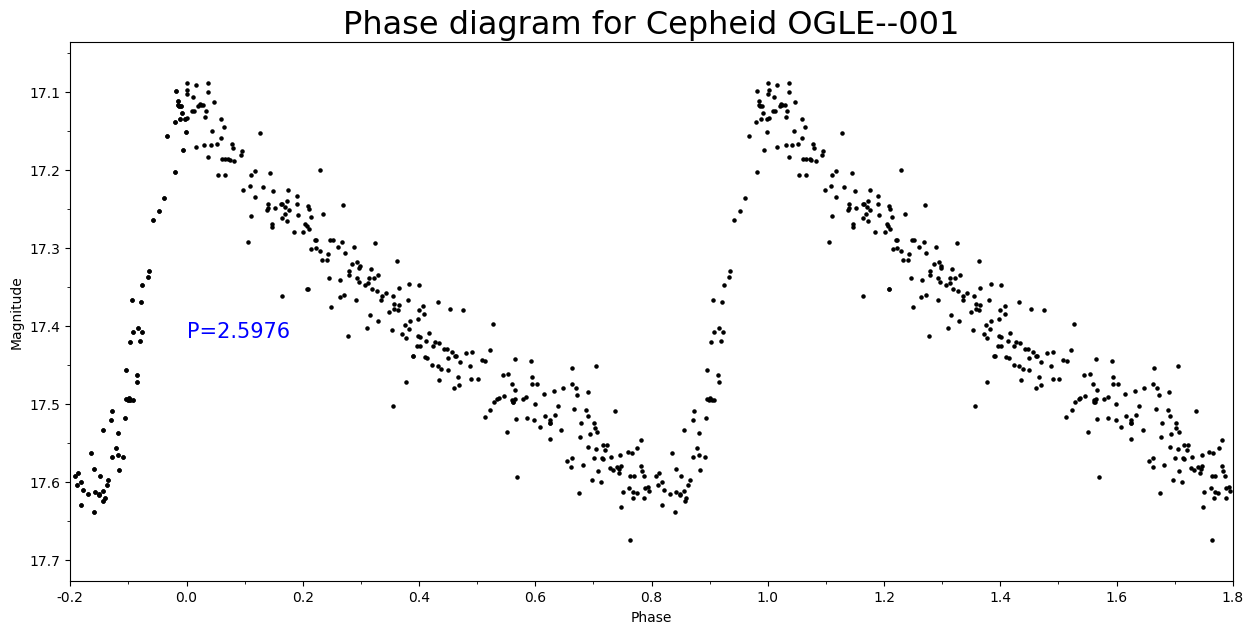

In [11]:
fig1, ax = PyPlt.subplots(figsize=(15, 7))
scatter(final_phase,final_magnitude,s=5,c="k")
text(0,np.median(Mag),"P="string(period),color="blue", fontsize=15)

xlabel("Phase")
ylabel("Magnitude")
title("Phase diagram for Cepheid OGLE--001",fontsize=23)

xmin=-0.2
xmax=1.8
ymin=(maximum(Mag)+(maximum(Mag)-minimum(Mag))*0.09)
ymax= (minimum(Mag)-(maximum(Mag)-minimum(Mag))*0.09)

PyPlt.axis([ xmin, xmax, ymin, ymax ]) 

# activate grids.
#ax.xaxis.grid(True, which='minor')
#ax[:xaxis][:grid](true, which="major")

#ax.yaxis.grid(True, which='minor')
#ax[:yaxis.][:grid](true, which="major")


#grid("on")

###########################
#  Set the tick interval  #
###########################
Mx = matplotlib[:ticker][:MultipleLocator](0.2) # Define interval of major ticks
f = matplotlib[:ticker][:FormatStrFormatter]("%1.1f") # Define format of tick labels
ax[:xaxis][:set_major_locator](Mx) # Set interval of major ticks
ax[:xaxis][:set_major_formatter](f) # Set format of tick labels

mx = matplotlib[:ticker][:MultipleLocator](0.1) # Define interval of minor ticks
ax[:xaxis][:set_minor_locator](mx) # Set interval of minor ticks

My = matplotlib[:ticker][:MultipleLocator](0.1) # Define interval of major ticks
ax[:yaxis][:set_major_locator](My) # Set interval of major ticks

my = matplotlib[:ticker][:MultipleLocator](0.05) # Define interval of minor ticks
ax[:yaxis][:set_minor_locator](my) # Set interval of minor ticks

#########################
#  Set tick dimensions  #
#########################
#ax[:xaxis][:set_tick_params](which="major",length=5,width=2)
#ax[:xaxis][:set_tick_params](which="minor",length=5,width=2)

PyPlt.show(fig1)